<a href="https://colab.research.google.com/github/masgro/diplodatos/blob/master/Practico_I_AyV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [16]:
%pylab inline
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn as sns
from termcolor import colored
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


In [2]:
sns.__version__

'0.9.0'

In [14]:
filename = '../AnalisisyVisualizacion/DataBases/hfi_cc_2018.csv'
dataset = pandas.read_csv(filename)
dataset.shape

(1458, 123)

In [13]:
dataset.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'pf_score', # Personal Freedom (score)
    'pf_rank',  # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank',  # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank',  # Human Freedom (rank)
]

In [6]:
dataset[important_cols].head()

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,6.111324,117.0,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,8.099696,42.0,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,6.912804,84.0,7.57,29.0,7.241402,57.0


In [7]:
data = dataset[important_cols]

In [8]:
data.columns

Index(['year', 'ISO_code', 'countries', 'region', 'pf_identity_legal',
       'pf_identity_parental_marriage', 'pf_identity_parental_divorce',
       'pf_identity_parental', 'pf_identity_sex_male',
       'pf_identity_sex_female', 'pf_identity_sex', 'pf_identity_divorce',
       'pf_identity', 'pf_score', 'pf_rank', 'ef_score', 'ef_rank', 'hf_score',
       'hf_rank'],
      dtype='object')

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

In [9]:
data[data['year'] == 2016].describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
count,162.0,103.000000,158.000000,159.000000,159.000000,162.000000,162.000000,162.000000,149.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.0,6.310680,7.183544,7.358491,7.279874,6.635802,7.808642,7.222222,7.449664,6.976337,6.984680,81.500000,6.795062,81.271605,6.889871,81.179012
std,0.0,3.635417,4.007697,3.889751,3.819334,4.723085,4.130682,4.132886,3.704337,3.089252,1.490253,46.909487,0.886026,46.964242,1.079601,46.941076
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.166555,1.000000,2.880000,1.000000,3.765827,1.000000
25%,2016.0,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.025427,41.250000,6.260000,41.250000,6.246463,41.250000
50%,2016.0,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,6.931511,81.500000,6.905000,81.500000,6.823996,81.500000
75%,2016.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.250000,8.141578,121.750000,7.467500,121.750000,7.771945,121.250000
max,2016.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.398842,162.000000,8.970000,162.000000,8.887410,162.000000


In [10]:
fields = ["pf_identity","hf_score"]

Year = data['year'] == 2016
LA = data['region'] == "Latin America & the Caribbean"

for field in fields:
  print("Column: ",colored(field,"red",attrs=["bold"]))
  print(" ",colored("All World","green",attrs=["bold"]))
  print("  Mean:   %.3f" % data[Year][field].mean())
  print("  Median: %.3f" % data[Year][field].median())
  print("  Std:    %.3f" % data[Year][field].std())
  print(" ",colored("Latin America & Caribe","green",attrs=["bold"]))
  print("  Mean:   %.3f" % data[Year & LA][field].mean())
  print("  Median: %.3f" % data[Year & LA][field].median())
  print("  Std:    %.3f" % data[Year & LA][field].std())

Column:  pf_identity
  All World
  Mean:   6.976
  Median: 8.000
  Std:    3.089
  Latin America & Caribe
  Mean:   8.016
  Median: 7.500
  Std:    1.785
Column:  hf_score
  All World
  Mean:   6.890
  Median: 6.824
  Std:    1.080
  Latin America & Caribe
  Mean:   6.954
  Median: 6.998
  Std:    0.705


7
pf_identity_sex_male 0 0
pf_identity_sex_female 0 1
pf_identity_sex 1 0
pf_identity 1 1
pf_score 2 0
ef_score 2 1
hf_score 3 0


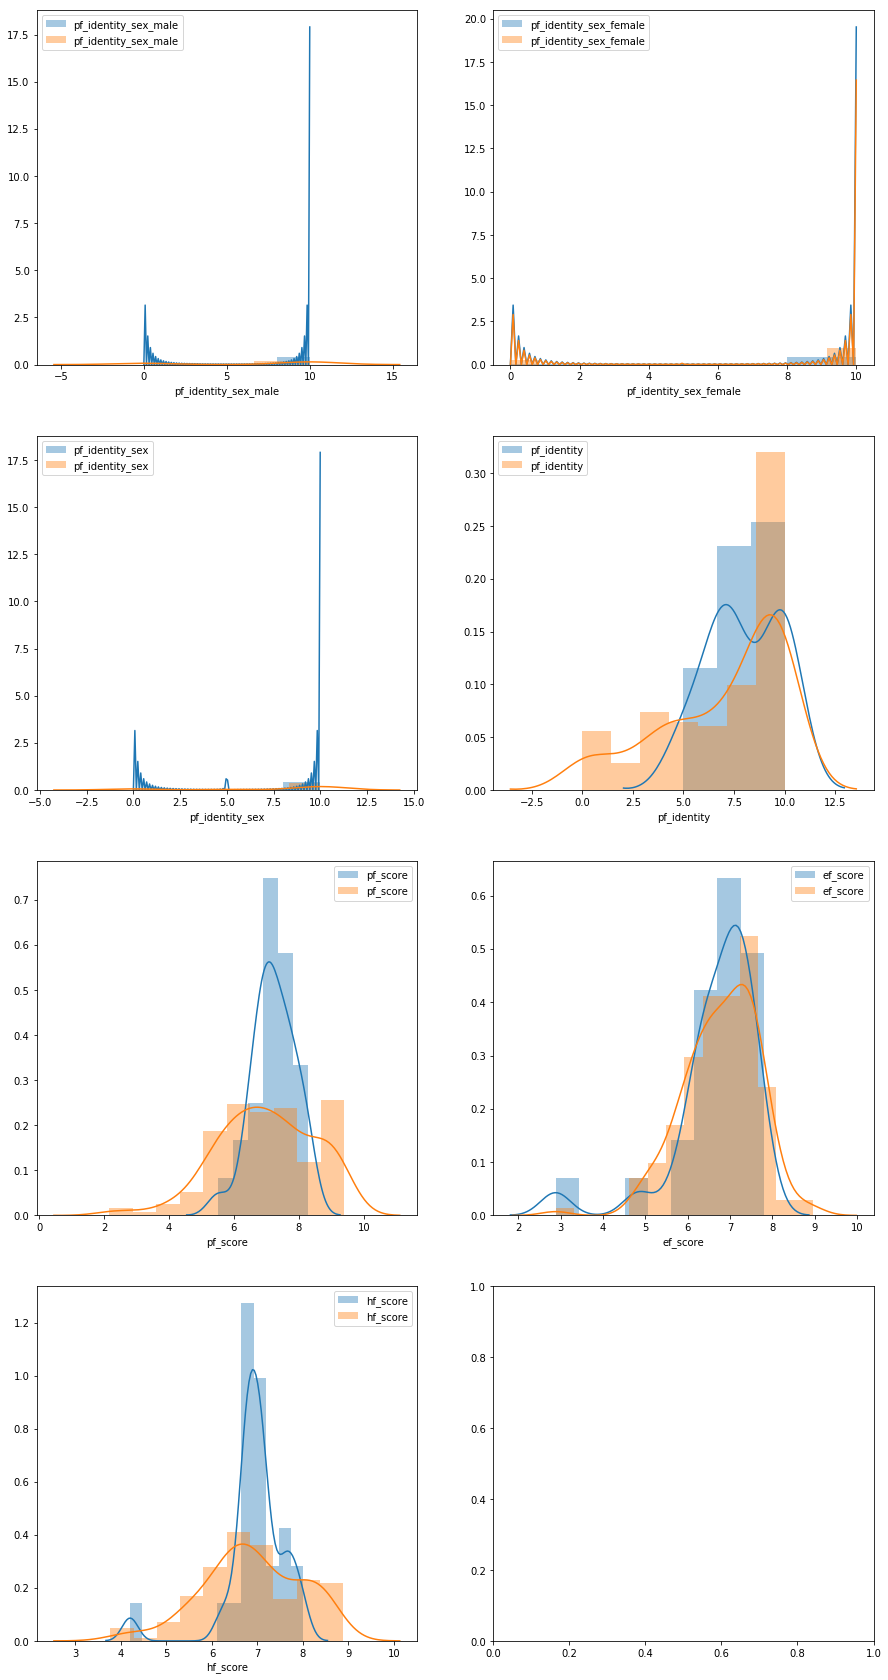

In [35]:
fields = [       'pf_identity_sex_male',
       'pf_identity_sex_female', 'pf_identity_sex',
       'pf_identity', 'pf_score','ef_score','hf_score']

print(len(fields))

f, axes = plt.subplots(4, 2, figsize=(15, 30))

for i,field in enumerate(fields):
    print(field,int(i/2),i%2)
    sns.distplot(data[Year & LA][field], label=field,ax=axes[int(i/2),i%2])
    sns.distplot(data[Year][field], label=field,ax=axes[int(i/2),i%2])
    axes[int(i/2),i%2].legend()

In [ ]:
#plot_data = clean_salario_neto(
#    dataset[con_aumento & age_mask & (dataset['Años en la empresa actual'] < 40) & (dataset['Años de experiencia'] < 40)])
#plot_data = plot_data.rename(columns={
#    'Años en la empresa actual': 'Antiguedad', 'Años de experiencia': 'Experiencia',
#    NETO_COL: 'Salario', '¿De qué % fue el ajuste?': 'Ajuste'
#})
sns.pairplot(
    data=data[Year],
    vars=['pf_identity_sex_male','pf_identity_sex_female','pf_identity_sex',
          'pf_identity','pf_score','ef_score','hf_score'],
    hue='region', 
    markers='+')

In [ ]:
data["IsLA"] = LA

plt.figure(figsize=(15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="hf_score",data=data,hue="IsLA",palette=["m","g"])
sns.despine(offset=10, trim=True)

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="year", y="pf_identity",data=data,hue="IsLA",palette=["m","g"])
sns.despine(offset=10, trim=True)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).to_crs('+proj=robin')
world = world[world.name != 'Antarctica']

_temp = data[['countries','hf_score']][Year]
_temp.columns = ["name","hf_score"]

world = world.join(_temp.set_index('name'),on='name')

In [ ]:
known = world.dropna(subset=['hf_score'])
unknown = world[world['hf_score'].isna()]

ax = known.plot(column='hf_score', cmap='inferno_r', figsize=(20, 12), scheme='fisher_jenks', k=9, legend=True, edgecolor='#aaaaaa')
unknown.plot(ax=ax, color='#ffffff', hatch='//', edgecolor='#aaaaaa')

ax.set_title('Human Freedom Score', fontdict={'fontsize': 20}, loc='left')
description = '''Based on The Human Freedom dataset'''.strip()
ax.annotate(description, xy=(0.07, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
legend = ax.get_legend()
legend.set_bbox_to_anchor((.11, .4))
legend.prop.set_size(12)

mi_pais = 'France'
print(world['hf_score'][world.name == mi_pais])
print(data['hf_score'][Year][data['countries'] == mi_pais])

In [ ]:
import json

#Read data to json.
world_json = json.loads(world.to_json())
#Convert to String like object.
json_data = json.dumps(world_json)

In [ ]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer
from bokeh.models import HoverTool

#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data)
#Define a sequential multi-hue color palette.
palette = brewer['Pastel2'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 1, high = 10)
#Define custom tick labels for color bar.
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
border_line_color=None,location = (0,0), orientation = 'horizontal')


#Create figure object.
TOOLS = "pan,wheel_zoom,reset,save"
p = figure(title = 'Human Freedom 2016', 
           plot_height = 600 , 
           plot_width = 950, 
           toolbar_location = 'left', 
           x_axis_location=None, 
           y_axis_location=None,
           tools = TOOLS,tooltips = [('country','@name'),('hf_score','@hf_score')])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.hover.point_policy = "follow_mouse"
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'hf_score', 'transform' : color_mapper}, line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify figure layout.
p.add_layout(color_bar, 'below')
#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

In [ ]:
import plotly_express as px
px.choropleth(data, locations="ISO_code", color="hf_score", hover_name="countries", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

In [ ]:
gapminder = px.data.gapminder()
gapminder.head()

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='hf_score',data=data,hue='region',lw=5.0)
sns.lineplot(x='year',y='hf_score',data=data,lw=5.0,color='k')
sns.despine()

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context("notebook")
sns.lineplot(x='year',y='pf_identity',data=data,hue='region',lw=5.0)
sns.lineplot(x='year',y='pf_identity',data=data,lw=5.0,color='k')
sns.despine()

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

In [ ]:
from scipy import stats

f, axes = plt.subplots(1, 2, figsize=(15, 7))

loc, scale = stats.norm.fit(data[Year & LA]['pf_identity'])
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

#sns.distplot(sample, label='Distribución normal',ax=axes[0])
sns.distplot(data[Year & LA]['pf_identity'], label='Personal Freedom Identity - LA',ax=axes[0])

loc, scale = stats.norm.fit(data[Year]['pf_identity'])
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

#sns.distplot(sample, label='Distribución normal',ax=axes[0])
sns.distplot(data[Year]['pf_identity'], label='Personal Freedom Identity - World',ax=axes[0])
axes[0].legend()


loc, scale = stats.norm.fit(data[Year & LA]['hf_score'])
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

#sns.distplot(sample, label='Distribución normal',ax=axes[1])
sns.distplot(data[Year & LA]['hf_score'], label='Human Freedom - LA',ax=axes[1])

loc, scale = stats.norm.fit(data[Year]['hf_score'])
norm_dist = stats.norm(loc, scale)
sample = norm_dist.rvs(1000)

#sns.distplot(sample, label='Distribución normal',ax=axes[1])
sns.distplot(data[Year]['hf_score'], label='Human Freedom - World',ax=axes[1])

axes[1].legend()


sns.despine()

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
